# DISPLAY MAPS

## Display sea ice statistics maps in the Weddell Sea using .nc files
- Read netCDF files for the sea ice statistics
- Draw sea ice statistics maps in the Weddell Sea

Credited by Younghyun Koo (kooala317@gmail.com)

## (1) Import necessary libraries

In [36]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import h5py
import matplotlib.pylab as plt
from math import *
import netCDF4
from netCDF4 import date2num,num2date
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import datetime as dt
from pyproj import Proj, transform

## (2) Read .nc file

In [8]:
# Enter name of the .nc file
ncname = f'D:\\Floes\\array\\Grid_fb_v6_entire_S_w_ibfiltering.nc'

with netCDF4.Dataset(ncname, 'r') as nc:
    keys = nc.variables.keys()
    print(keys)
    
    # X/Y coordinates and lat/lon on the NSIDC sea ice stereogeographic south
    x = np.array(nc.variables['x'])
    y = np.array(nc.variables['y'])
    xx, yy = np.meshgrid(x, y)
    lat = np.array(nc.variables['lat'])
    lon = np.array(nc.variables['lon'])
    
    # Times in seconds from 1800/01/01
    times = np.array(nc.variables['time'])
    t = num2date(nc.variables['time'], nc.variables['time'].units)
    
    # Freeboard statistics
    # fmode = np.array(nc.variables['fb_mode'])
    # # fmean = np.array(nc.variables['fb_mean'])
    # # fmed = np.array(nc.variables['fb_med'])
    # fstd = np.array(nc.variables['fb_std'])
    # fridge = np.array(nc.variables['fr_ridge'])
    # hridge = np.array(nc.variables['h_ridge'])
    # # flead = np.array(nc.variables['fr_lead'])
    
    # # Floe statistics
    # # flen = np.array(nc.variables['floe_len'])
    # # fcnt = np.array(nc.variables['floe_cnt'])
    # ibcnt = np.array(nc.variables['ib_cnt'])

dict_keys(['x', 'y', 'time', 'lat', 'lon', 'fb_mode', 'fb_mean', 'fb_med', 'fb_std', 'fr_ridge', 'h_ridge', 'fr_lead', 'floe_len', 'floe_cnt', 'ib_cnt'])


In [3]:
# Enter name of the .nc file without iceberg filtering
ncname = f'D:\\Floes\\array\\Grid_fb_v6_entire_S.nc'

with netCDF4.Dataset(ncname, 'r') as nc:
    keys = nc.variables.keys()
    print(keys)
    
#     # X/Y coordinates and lat/lon on the NSIDC sea ice stereogeographic south
#     x = np.array(nc.variables['x'])
#     y = np.array(nc.variables['y'])
#     xx, yy = np.meshgrid(x, y)
#     lat = np.array(nc.variables['lat'])
#     lon = np.array(nc.variables['lon'])
    
#     # Times in seconds from 1800/01/01
#     times = np.array(nc.variables['time'])
#     t = num2date(nc.variables['time'], nc.variables['time'].units)
    
    # Freeboard statistics
    fmode0 = np.array(nc.variables['fb_mode'])
    # fmean = np.array(nc.variables['fb_mean'])
    # fmed = np.array(nc.variables['fb_med'])
    fstd0 = np.array(nc.variables['fb_std'])
    fridge0 = np.array(nc.variables['fr_ridge'])
    hridge0 = np.array(nc.variables['h_ridge'])
    # flead = np.array(nc.variables['fr_lead'])
    
    # Floe statistics
    # flen = np.array(nc.variables['floe_len'])
    # fcnt = np.array(nc.variables['floe_cnt'])
    # ibcnt = np.array(nc.variables['ib_cnt'])

dict_keys(['x', 'y', 'time', 'lat', 'lon', 'fb_mode', 'fb_mean', 'fb_med', 'fb_std', 'fr_ridge', 'h_ridge', 'fr_lead', 'floe_len', 'floe_cnt'])


## (3) Draw maps in the Weddell Sea

#### Mode freeboard

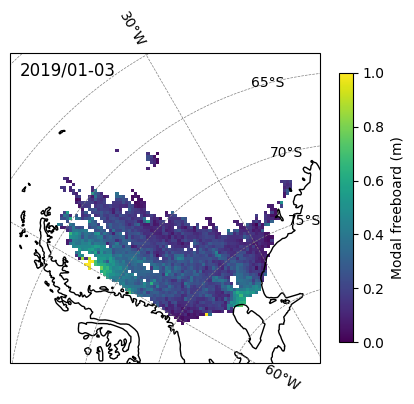

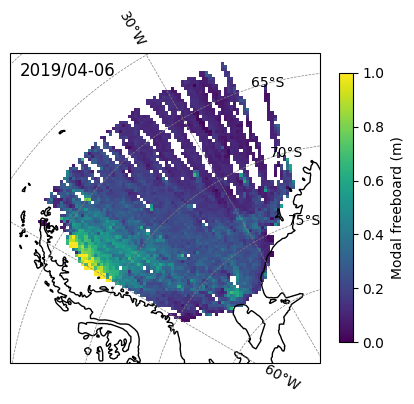

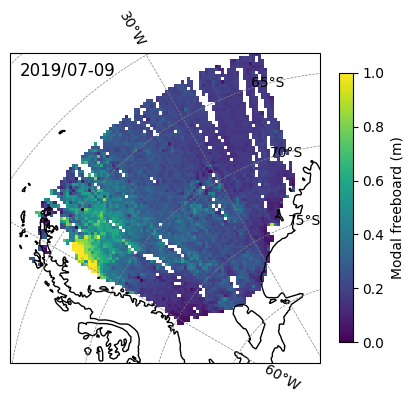

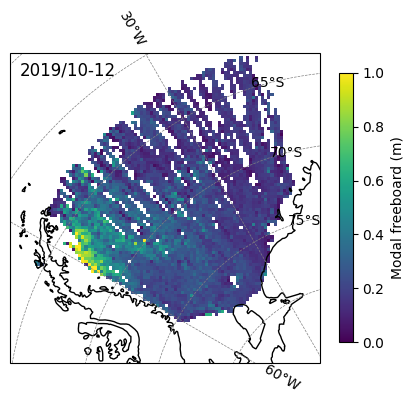

In [139]:
# Draw the mean of the variable in the time series from date1 to date2
year = 2019
for month in [1, 4, 7, 10]:# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

    date1 = dt.datetime(year, month, 1)
    date2 = date1 + dt.timedelta(days = 90) #dt.datetime(2019, 9, 1)
    
    fig, ax = fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi= 100, subplot_kw={'projection': ccrs.SouthPolarStereo()})
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs = np.arange(-180, 180, 30),
                          linewidth=0.5, color='grey', linestyle='--')
        
    gl.xlabels_top = True
    gl.xlabels_bottom = True
    # gl.xlabels_left = True
    # gl.xlabels_right = True
    gl.ylabels_left = True
    gl.ylabels_right = True
    
    ax.coastlines()
    idx = (t >= date1) & (t < date2)
    # m = ax.pcolormesh(xx, yy, np.nanmean(ibcnt[idx], axis=0)-np.nanmean(ibcnt[idx], axis=0))
    # m = ax.pcolormesh(xx, yy, np.nanmean(fmode[idx], axis=0)-np.nanmean(fmode0[idx], axis=0))
    m = ax.pcolormesh(xx, yy, np.nanmean(fmode[idx], axis=0), vmin = 0, vmax = 1.0)
    fig.colorbar(m, ax=ax, shrink = 0.7, label = "Modal freeboard (m)")
    plt.annotate(f"{year}/{str(month).zfill(2)}-{str(month+2).zfill(2)}", xy=(0.03, 0.97), xycoords='axes fraction', va = "top", fontsize=12)
    plt.savefig(f"D:\\Floes\\figures\\IB_Modal_fb_{month}_filtering.png", bbox_inches = "tight")

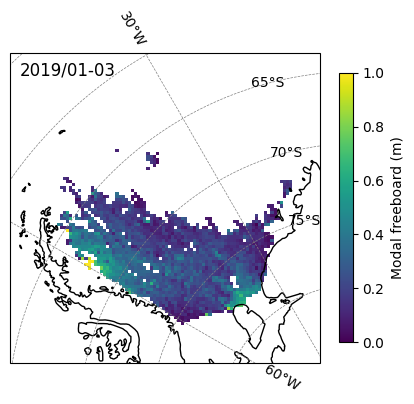

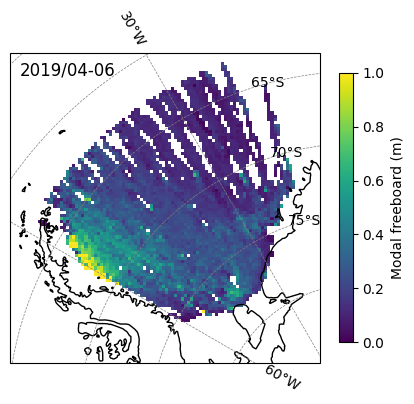

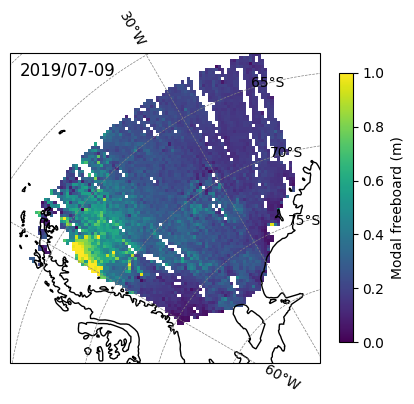

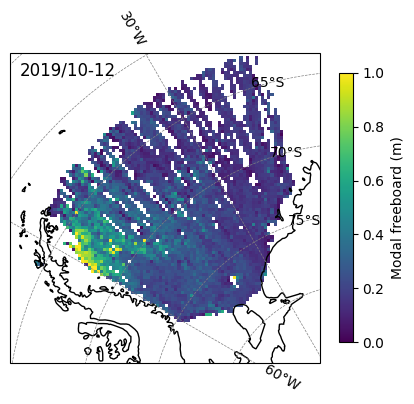

In [140]:
for month in [1, 4, 7, 10]:# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

    date1 = dt.datetime(2019, month, 1)
    date2 = date1 + dt.timedelta(days = 90) #dt.datetime(2019, 9, 1)
    
    fig, ax = fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi= 100, subplot_kw={'projection': ccrs.SouthPolarStereo()})
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs = np.arange(-180, 180, 30),
                          linewidth=0.5, color='grey', linestyle='--')
        
    gl.xlabels_top = True
    gl.xlabels_bottom = True
    # gl.xlabels_left = True
    # gl.xlabels_right = True
    gl.ylabels_left = True
    gl.ylabels_right = True
    
    ax.coastlines()
    idx = (t >= date1) & (t < date2)
    # m = ax.pcolormesh(xx, yy, np.nanmean(ibcnt[idx], axis=0)-np.nanmean(ibcnt[idx], axis=0))
    # m = ax.pcolormesh(xx, yy, np.nanmean(fmode[idx], axis=0)-np.nanmean(fmode0[idx], axis=0))
    m = ax.pcolormesh(xx, yy, np.nanmean(fmode0[idx], axis=0), vmin = 0, vmax = 1.0)
    plt.annotate(f"{year}/{str(month).zfill(2)}-{str(month+2).zfill(2)}", xy=(0.03, 0.97), xycoords='axes fraction', va = "top", fontsize=12)
    fig.colorbar(m, ax=ax, shrink = 0.7, label = "Modal freeboard (m)")
    plt.savefig(f"D:\\Floes\\figures\\IB_Modal_fb_{month}_nofiltering.png", bbox_inches = "tight")

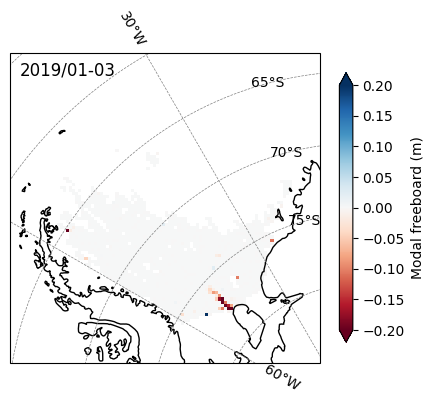

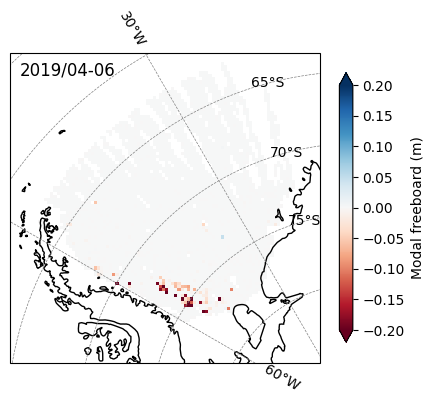

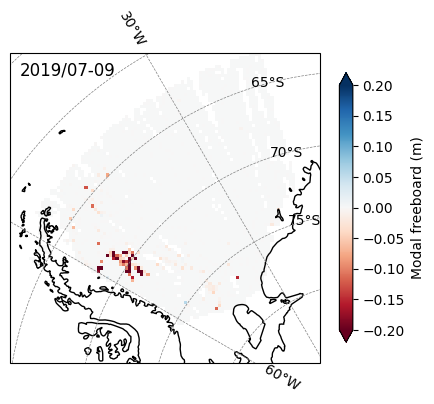

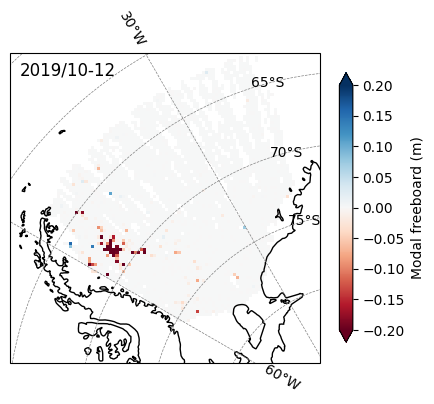

In [144]:
for month in [1, 4, 7, 10]:# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

    date1 = dt.datetime(2019, month, 1)
    date2 = date1 + dt.timedelta(days = 90) #dt.datetime(2019, 9, 1)
    
    fig, ax = fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi= 100, subplot_kw={'projection': ccrs.SouthPolarStereo()})
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs = np.arange(-180, 180, 30),
                          linewidth=0.5, color='grey', linestyle='--')
        
    gl.xlabels_top = True
    gl.xlabels_bottom = True
    # gl.xlabels_left = True
    # gl.xlabels_right = True
    gl.ylabels_left = True
    gl.ylabels_right = True
    
    ax.coastlines()
    idx = (t >= date1) & (t < date2)
    # m = ax.pcolormesh(xx, yy, np.nanmean(ibcnt[idx], axis=0)-np.nanmean(ibcnt[idx], axis=0))
    m = ax.pcolormesh(xx, yy, np.nanmean(fmode[idx], axis=0)-np.nanmean(fmode0[idx], axis=0),
                      vmin = -0.2, vmax=0.2, cmap = "RdBu")
    # m = ax.pcolormesh(xx, yy, np.nanmean(fmode0[idx], axis=0), vmin = 0, vmax = 1.0)
    fig.colorbar(m, ax=ax, shrink = 0.7, label = "Modal freeboard (m)", extend = "both")
    plt.annotate(f"{year}/{str(month).zfill(2)}-{str(month+2).zfill(2)}", xy=(0.03, 0.97), xycoords='axes fraction', va = "top", fontsize=12)
    plt.savefig(f"D:\\Floes\\figures\\IB_Modal_fb_{month}_diff.png", bbox_inches = "tight")

#### Ridge fraction

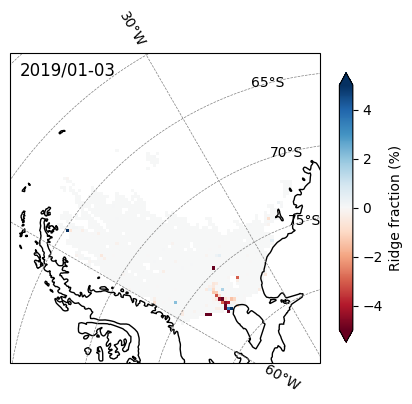

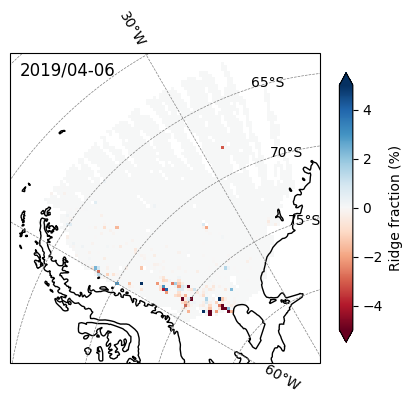

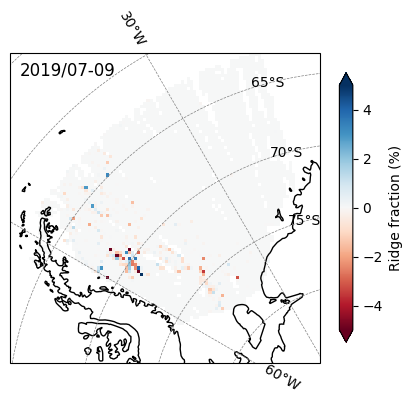

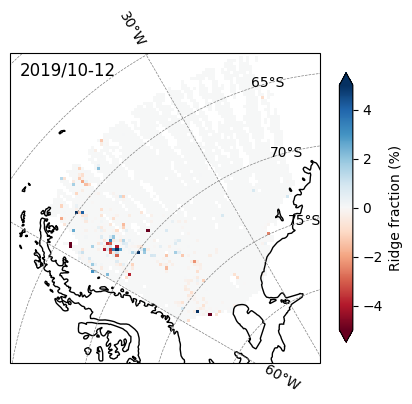

In [147]:
for month in [1, 4, 7, 10]:# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

    date1 = dt.datetime(2019, month, 1)
    date2 = date1 + dt.timedelta(days = 90) #dt.datetime(2019, 9, 1)
    
    fig, ax = fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi= 100, subplot_kw={'projection': ccrs.SouthPolarStereo()})
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs = np.arange(-180, 180, 30),
                          linewidth=0.5, color='grey', linestyle='--')
        
    gl.xlabels_top = True
    gl.xlabels_bottom = True
    # gl.xlabels_left = True
    # gl.xlabels_right = True
    gl.ylabels_left = True
    gl.ylabels_right = True
    
    ax.coastlines()
    idx = (t >= date1) & (t < date2)
    # m = ax.pcolormesh(xx, yy, np.nanmean(ibcnt[idx], axis=0)-np.nanmean(ibcnt[idx], axis=0))
    m = ax.pcolormesh(xx, yy, np.nanmean(fridge[idx], axis=0)-np.nanmean(fridge0[idx], axis=0),
                      vmin = -5, vmax=5, cmap = "RdBu")
    # m = ax.pcolormesh(xx, yy, np.nanmean(fmode0[idx], axis=0), vmin = 0, vmax = 1.0)
    fig.colorbar(m, ax=ax, shrink = 0.7, label = "Ridge fraction (%)", extend = "both")
    plt.annotate(f"{year}/{str(month).zfill(2)}-{str(month+2).zfill(2)}", xy=(0.03, 0.97), xycoords='axes fraction', va = "top", fontsize=12)
    plt.savefig(f"D:\\Floes\\figures\\IB_Ridge_fr_{month}_diff.png", bbox_inches = "tight")

#### Ridge height

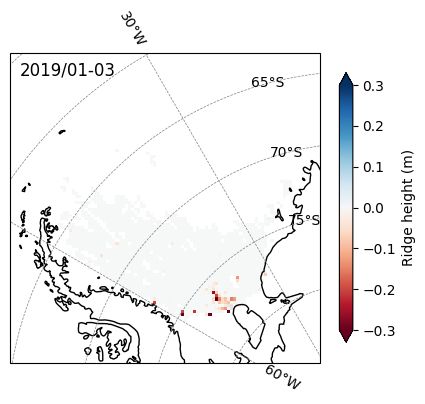

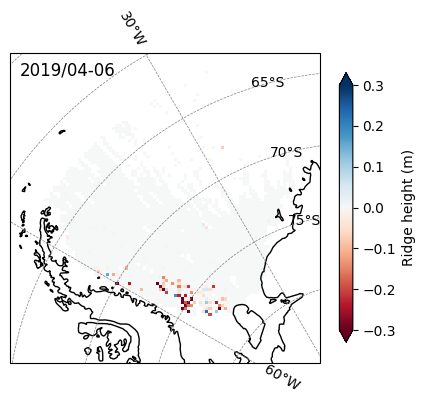

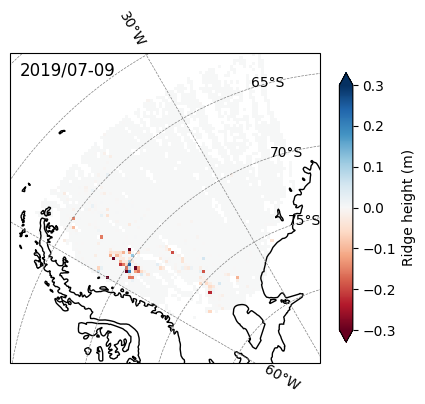

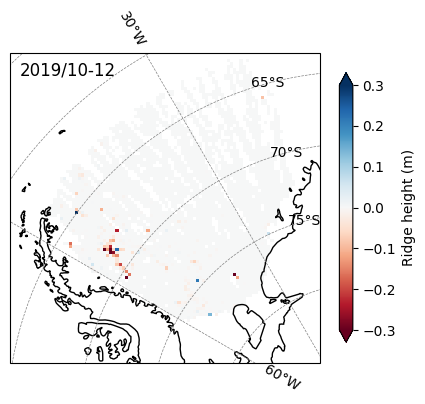

In [154]:
for month in [1, 4, 7, 10]:# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

    date1 = dt.datetime(2019, month, 1)
    date2 = date1 + dt.timedelta(days = 90) #dt.datetime(2019, 9, 1)
    
    fig, ax = fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi= 100, subplot_kw={'projection': ccrs.SouthPolarStereo()})
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs = np.arange(-180, 180, 30),
                          linewidth=0.5, color='grey', linestyle='--')
        
    gl.xlabels_top = True
    gl.xlabels_bottom = True
    # gl.xlabels_left = True
    # gl.xlabels_right = True
    gl.ylabels_left = True
    gl.ylabels_right = True
    
    ax.coastlines()
    idx = (t >= date1) & (t < date2)
    # m = ax.pcolormesh(xx, yy, np.nanmean(ibcnt[idx], axis=0)-np.nanmean(ibcnt[idx], axis=0))
    m = ax.pcolormesh(xx, yy, np.nanmean(hridge[idx], axis=0)-np.nanmean(hridge0[idx], axis=0),
                      vmin = -0.3, vmax=0.3, cmap = "RdBu")
    # m = ax.pcolormesh(xx, yy, np.nanmean(fmode0[idx], axis=0), vmin = 0, vmax = 1.0)
    fig.colorbar(m, ax=ax, shrink = 0.7, label = "Ridge height (m)", extend = "both")
    plt.annotate(f"{year}/{str(month).zfill(2)}-{str(month+2).zfill(2)}", xy=(0.03, 0.97), xycoords='axes fraction', va = "top", fontsize=12)
    plt.savefig(f"D:\\Floes\\figures\\IB_Ridge_h_{month}_diff.png", bbox_inches = "tight")

#### Standard devation of freeboard

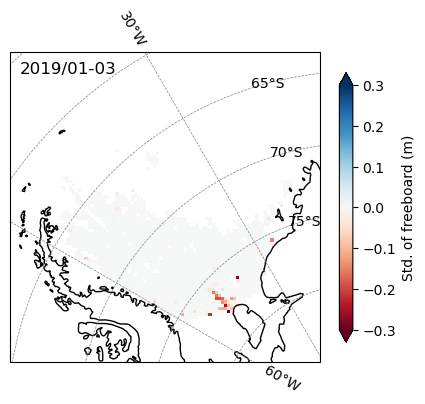

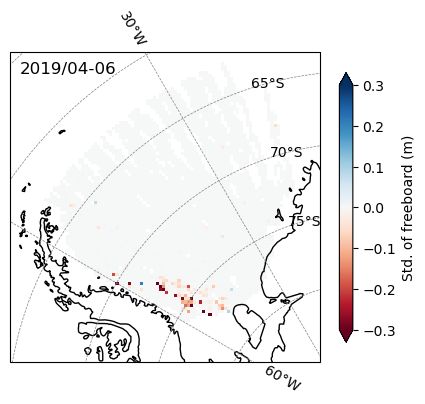

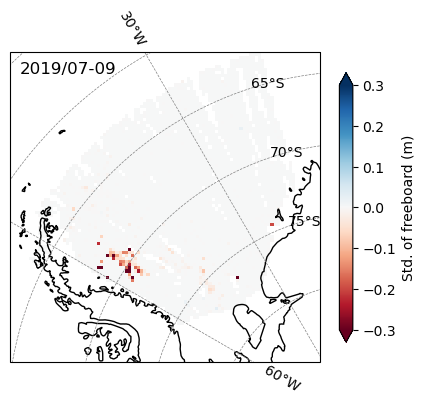

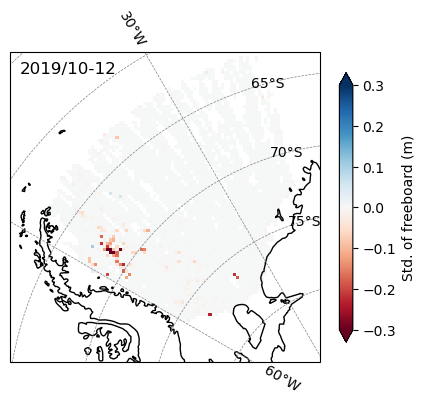

In [5]:
year = 2019
for month in [1, 4, 7, 10]:# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

    date1 = dt.datetime(2019, month, 1)
    date2 = date1 + dt.timedelta(days = 90) #dt.datetime(2019, 9, 1)
    
    fig, ax = fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi= 100, subplot_kw={'projection': ccrs.SouthPolarStereo()})
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs = np.arange(-180, 180, 30),
                          linewidth=0.5, color='grey', linestyle='--')
        
    gl.xlabels_top = True
    gl.xlabels_bottom = True
    # gl.xlabels_left = True
    # gl.xlabels_right = True
    gl.ylabels_left = True
    gl.ylabels_right = True
    
    ax.coastlines()
    idx = (t >= date1) & (t < date2)
    # m = ax.pcolormesh(xx, yy, np.nanmean(ibcnt[idx], axis=0)-np.nanmean(ibcnt[idx], axis=0))
    m = ax.pcolormesh(xx, yy, np.nanmean(fstd[idx], axis=0)-np.nanmean(fstd0[idx], axis=0),
                      vmin = -0.3, vmax=0.3, cmap = "RdBu")
    # m = ax.pcolormesh(xx, yy, np.nanmean(fmode0[idx], axis=0), vmin = 0, vmax = 1.0)
    fig.colorbar(m, ax=ax, shrink = 0.7, label = "Std. of freeboard (m)", extend = "both")
    plt.annotate(f"{year}/{str(month).zfill(2)}-{str(month+2).zfill(2)}", xy=(0.03, 0.97), xycoords='axes fraction', va = "top", fontsize=12)
    plt.savefig(f"D:\\Floes\\figures\\IB_Std_fb_{month}_diff.png", bbox_inches = "tight")

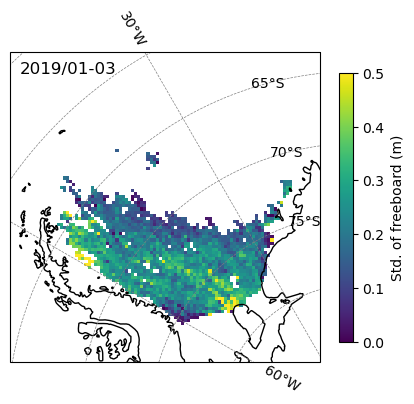

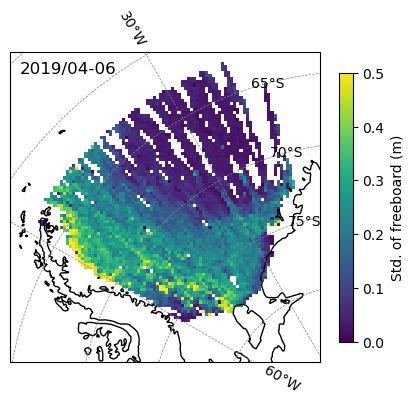

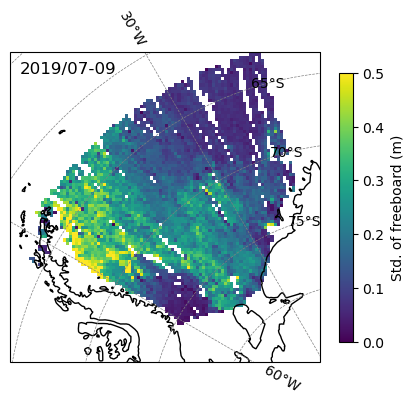

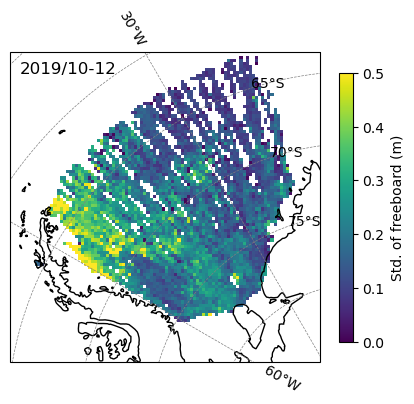

In [9]:
for month in [1, 4, 7, 10]:# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

    date1 = dt.datetime(2019, month, 1)
    date2 = date1 + dt.timedelta(days = 90) #dt.datetime(2019, 9, 1)
    
    fig, ax = fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi= 100, subplot_kw={'projection': ccrs.SouthPolarStereo()})
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs = np.arange(-180, 180, 30),
                          linewidth=0.5, color='grey', linestyle='--')
        
    gl.xlabels_top = True
    gl.xlabels_bottom = True
    # gl.xlabels_left = True
    # gl.xlabels_right = True
    gl.ylabels_left = True
    gl.ylabels_right = True
    
    ax.coastlines()
    idx = (t >= date1) & (t < date2)
    # m = ax.pcolormesh(xx, yy, np.nanmean(ibcnt[idx], axis=0)-np.nanmean(ibcnt[idx], axis=0))
    # m = ax.pcolormesh(xx, yy, np.nanmean(fmode[idx], axis=0)-np.nanmean(fmode0[idx], axis=0))
    m = ax.pcolormesh(xx, yy, np.nanmean(fstd0[idx], axis=0), vmin = 0, vmax = 0.5)
    plt.annotate(f"{year}/{str(month).zfill(2)}-{str(month+2).zfill(2)}", xy=(0.03, 0.97), xycoords='axes fraction', va = "top", fontsize=12)
    fig.colorbar(m, ax=ax, shrink = 0.7, label = "Std. of freeboard (m)")
    plt.savefig(f"D:\\Floes\\figures\\IB_Std_fb_{month}_nofiltering.png", bbox_inches = "tight")

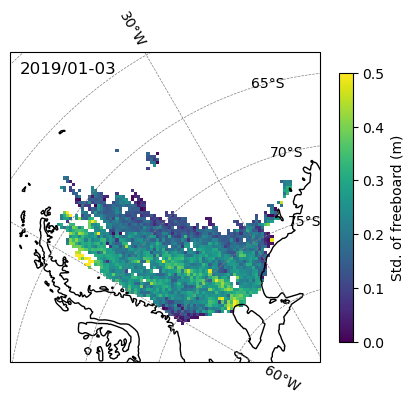

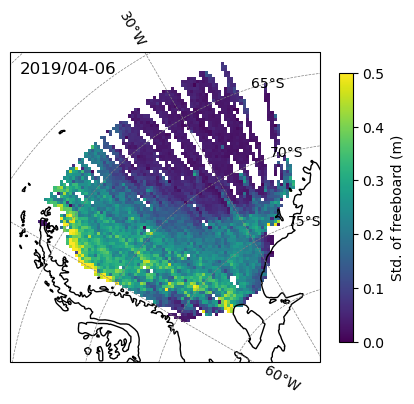

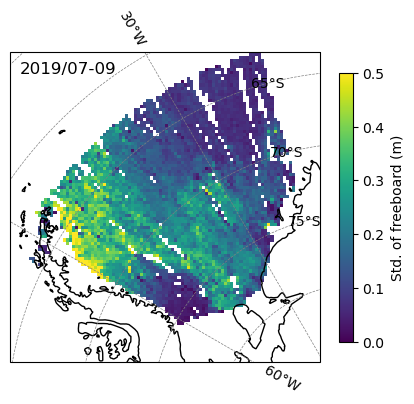

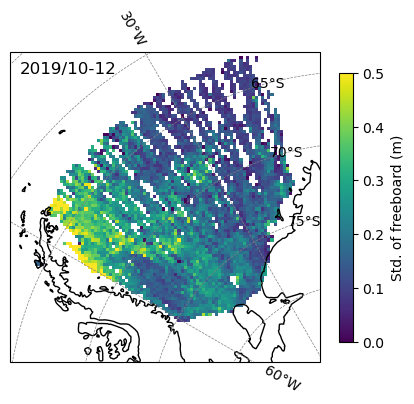

In [10]:
for month in [1, 4, 7, 10]:# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

    date1 = dt.datetime(2019, month, 1)
    date2 = date1 + dt.timedelta(days = 90) #dt.datetime(2019, 9, 1)
    
    fig, ax = fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi= 100, subplot_kw={'projection': ccrs.SouthPolarStereo()})
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs = np.arange(-180, 180, 30),
                          linewidth=0.5, color='grey', linestyle='--')
        
    gl.xlabels_top = True
    gl.xlabels_bottom = True
    # gl.xlabels_left = True
    # gl.xlabels_right = True
    gl.ylabels_left = True
    gl.ylabels_right = True
    
    ax.coastlines()
    idx = (t >= date1) & (t < date2)
    # m = ax.pcolormesh(xx, yy, np.nanmean(ibcnt[idx], axis=0)-np.nanmean(ibcnt[idx], axis=0))
    # m = ax.pcolormesh(xx, yy, np.nanmean(fmode[idx], axis=0)-np.nanmean(fmode0[idx], axis=0))
    m = ax.pcolormesh(xx, yy, np.nanmean(fstd[idx], axis=0), vmin = 0, vmax = 0.5)
    plt.annotate(f"{year}/{str(month).zfill(2)}-{str(month+2).zfill(2)}", xy=(0.03, 0.97), xycoords='axes fraction', va = "top", fontsize=12)
    fig.colorbar(m, ax=ax, shrink = 0.7, label = "Std. of freeboard (m)")
    plt.savefig(f"D:\\Floes\\figures\\IB_Std_fb_{month}_filtering.png", bbox_inches = "tight")

#### Landfast ice fraction

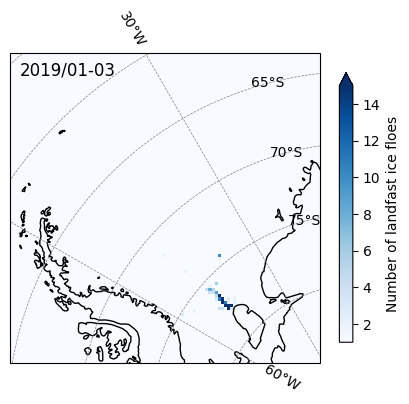

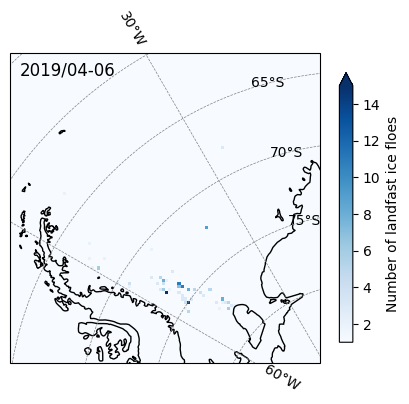

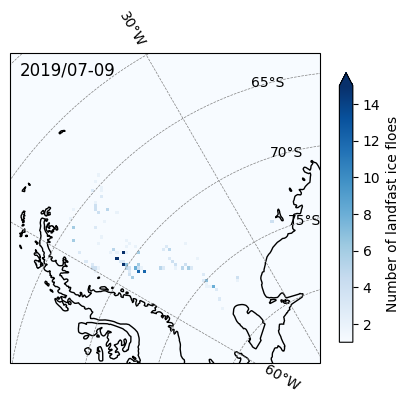

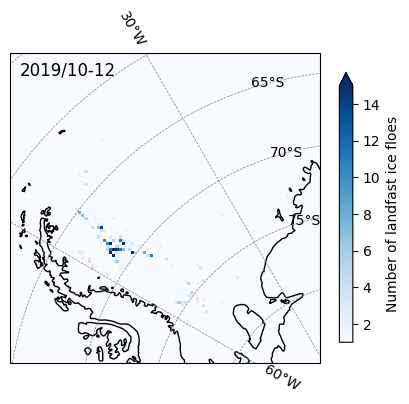

In [168]:
for month in [1, 4, 7, 10]:# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

    date1 = dt.datetime(2019, month, 1)
    date2 = date1 + dt.timedelta(days = 90) #dt.datetime(2019, 9, 1)
    
    fig, ax = fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi= 100, subplot_kw={'projection': ccrs.SouthPolarStereo()})
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs = np.arange(-180, 180, 30),
                          linewidth=0.5, color='grey', linestyle='--')
        
    gl.xlabels_top = True
    gl.xlabels_bottom = True
    # gl.xlabels_left = True
    # gl.xlabels_right = True
    gl.ylabels_left = True
    gl.ylabels_right = True
    
    ax.coastlines()
    idx = (t >= date1) & (t < date2)
    values = np.nansum(ibcnt[idx], axis=0)
    # values = np.where(values > 0, values, axis=0), 0)
    m = ax.pcolormesh(xx, yy, values, vmin = 1, vmax = 15, cmap = "Blues")
    fig.colorbar(m, ax=ax, shrink = 0.7, label = "Number of landfast ice floes", extend = "max")
    plt.annotate(f"{year}/{str(month).zfill(2)}-{str(month+2).zfill(2)}", xy=(0.03, 0.97), xycoords='axes fraction', va = "top", fontsize=12)
    plt.savefig(f"D:\\Floes\\figures\\IB_landfast_{month}_diff.png", bbox_inches = "tight")

## Track landfast ice

In [59]:
year = 2019
th_fb = 1.0
th_sigma = 0.02
th_std = 0.08
df_all = pd.read_csv(f"D:\\Floes\\icebergs\\Icebergs_Weddell_2019_fb{th_fb}_sigma{th_sigma}_std{th_std}.csv", index_col = 0)

bbox = [-62, -77.6, -15, -62]

In [60]:
for i in range(0, len(df_all)):
    df_all.loc[i, "jday"] = int(dt.datetime(df_all.loc[i, "year"], df_all.loc[i, "month"], df_all.loc[i, "day"]).strftime("%j"))

In [61]:
df_all

,filename,beam,year,month,day,lat,lon,seg_x,id_st,id_en,fb_mean,fb_max,fb_min,fb_std,width,jday
0,ATL10-02_20190106015150_01320201_006_02.h5,gt1l,2019,1,6,-74.601091,-58.051187,2.839684e+07,40357.0,40441.0,3.382634,3.622471,2.905646,0.162428,467.942822,6.0
1,ATL10-02_20190106015150_01320201_006_02.h5,gt1l,2019,1,6,-74.698224,-58.105407,2.840780e+07,41939.0,42027.0,3.714575,4.115487,3.518111,0.135430,479.270515,6.0
2,ATL10-02_20190106015150_01320201_006_02.h5,gt2l,2019,1,6,-74.592652,-58.161481,2.839639e+07,32841.0,32880.0,2.964939,3.092570,2.726331,0.098351,271.383130,6.0
3,ATL10-02_20190106015150_01320201_006_02.h5,gt2l,2019,1,6,-74.691113,-58.217155,2.840750e+07,34142.0,34725.0,3.709136,4.193796,2.850458,0.273464,4092.798666,6.0
4,ATL10-02_20190106142608_01400201_006_02.h5,gt1l,2019,1,6,-76.181920,-53.830477,3.163839e+07,51.0,143.0,2.217194,2.620863,1.873965,0.241777,500.147166,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,ATL10-02_20191227212157_00180601_006_01.h5,gt1r,2019,12,27,-69.592571,-55.429299,3.238080e+07,47538.0,47964.0,1.781633,2.922630,1.126818,0.362740,2309.680308,361.0
2530,ATL10-02_20191227212157_00180601_006_01.h5,gt2r,2019,12,27,-69.758166,-55.283330,3.236177e+07,32555.0,32626.0,1.499797,2.146449,1.192062,0.190592,498.763759,361.0
2531,ATL10-02_20191227212157_00180601_006_01.h5,gt2r,2019,12,27,-69.601357,-55.339160,3.237940e+07,35096.0,35123.0,1.230113,1.465532,0.984533,0.122891,187.562343,361.0
2532,ATL10-02_20191227212157_00180601_006_01.h5,gt2r,2019,12,27,-69.584977,-55.344952,3.238124e+07,35363.0,35398.0,1.281716,1.671405,1.098860,0.137134,236.813306,361.0


In [62]:
x, y = transform(Proj("EPSG:4326"), Proj("EPSG:3412"), df_all['lat'], df_all['lon'])

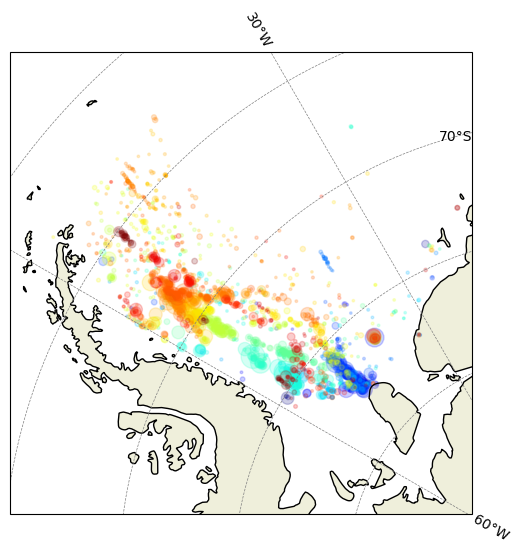

In [63]:
fig, ax = fig, ax = plt.subplots(1, 1, figsize=(6,6), dpi= 100, subplot_kw={'projection': ccrs.SouthPolarStereo()})
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs = np.arange(-180, 180, 30),
                      linewidth=0.5, color='grey', linestyle='--')
    
gl.xlabels_top = True
gl.xlabels_bottom = True
# gl.xlabels_left = True
# gl.xlabels_right = True
gl.ylabels_left = True
gl.ylabels_right = True

ax.coastlines()
# ax.stock_img()
ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.OCEAN)

width = 2500000
ax.set_xlim(-2800000, -3000000 + width)
ax.set_ylim(300000, 100000 + width)

ax.scatter(x, y, c = df_all['jday'], s = df_all['width']/50, alpha = 0.2, cmap = "jet")

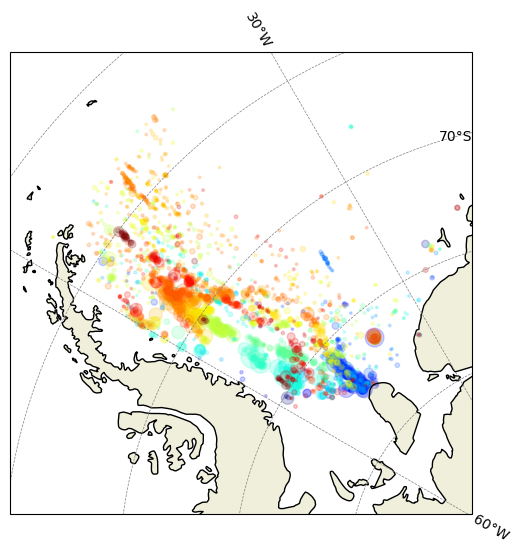

In [58]:
fig, ax = fig, ax = plt.subplots(1, 1, figsize=(6,6), dpi= 100, subplot_kw={'projection': ccrs.SouthPolarStereo()})
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs = np.arange(-180, 180, 30),
                      linewidth=0.5, color='grey', linestyle='--')
    
gl.xlabels_top = True
gl.xlabels_bottom = True
# gl.xlabels_left = True
# gl.xlabels_right = True
gl.ylabels_left = True
gl.ylabels_right = True

ax.coastlines()
# ax.stock_img()
ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.OCEAN)

width = 2500000
ax.set_xlim(-2800000, -3000000 + width)
ax.set_ylim(300000, 100000 + width)

ax.scatter(x, y, c = df_all['jday'], s = df_all['width']/50, alpha = 0.2, cmap = "jet")

## Sensitivity analysis

In [79]:
region = "Weddell"

sigmas = [0.02, 0.018, 0.016, 0.014]
stds = [0.1, 0.08, 0.06, 0.04]

count_points = np.zeros((len(sigmas), len(stds)))

for year in [2019]:

    th_fb = 1.0
    
    for i, th_sigma in enumerate(sigmas):
        for j, th_std in enumerate(stds):

            df = pd.read_csv(f"D:\\Floes\\icebergs\\Icebergs_{region}_{year}_fb{th_fb}_sigma{th_sigma}_std{th_std}.csv", index_col = 0)
            
            for k in range(0, len(df)):
                count_points[i,j] += df.loc[k, 'id_en'] - df.loc[k, 'id_st'] + 1


Text(0.5, 0, 'Std. of Freeboard')

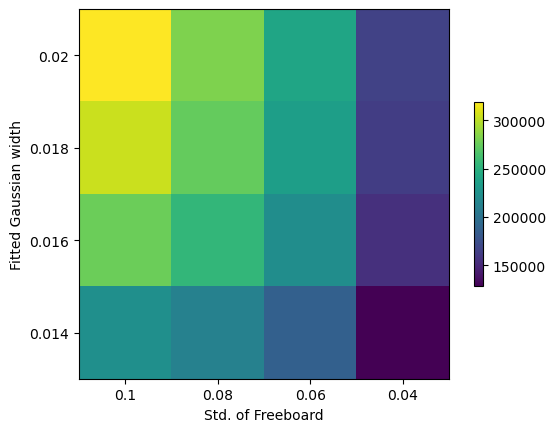

In [85]:
plt.imshow(count_points)
plt.xticks(range(0, len(stds)), stds)
plt.yticks(range(0, len(sigmas)), sigmas)
plt.colorbar(shrink = 0.5)
plt.ylabel('Fitted Gaussian width')
plt.xlabel('Std. of Freeboard')

In [89]:
import matplotlib

cmap = matplotlib.cm.get_cmap('Spectral')

rgba = cmap(0.5)
print(rgba) 

(0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0)


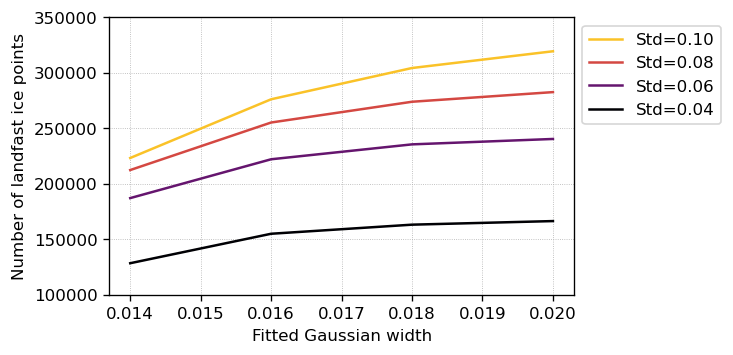

In [131]:
cmap = matplotlib.cm.get_cmap('inferno')

plt.figure(figsize = (5,3), dpi = 120)
for j, th_std in enumerate(stds):
    color = cmap((th_std - min(stds))/(max(stds) - min(stds)+0.01))
    plt.plot(sigmas, count_points[:, j], label = f"Std={th_std:.2f}", color = color)

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.ylabel('Number of landfast ice points')
plt.xlabel('Fitted Gaussian width')
plt.grid(ls = ":", lw = 0.5)
plt.ylim(100000, 350000)
plt.savefig("D:\\Documents\\Submit_paper\\Landfast_Weddell\\Fig07.png", bbox_inches = "tight")

In [ ]:
count_points = 0

for i in range(0, len(df_ib2)):
    count_points += df_ib2.loc[i, 'id_en'] - df_ib2.loc[i, 'id_st'] + 1

## Compare Iceberg and Sea ice features

In [2]:
import glob
from functions_floes import *

In [3]:
bbox = [-65, -77.6, -15, -62]

In [4]:
ib_files = glob.glob("D:\\Floes\\icebergs\\csvfiles\\*ib.csv")
ib_files

first = True

for f in ib_files:
    df_ib0 = pd.read_csv(f)

    df_ib0['fb_std'] = pd.Series(df_ib0['fb']).rolling(3, center = True).std().values
    beam = f[-11:-7]
    filename = "D:\\Floes\\ATL10\\{0}".format(os.path.basename(f)[:-12] + ".h5")
    df_raw = read_ATL10(filename, bbox)

    # for i in range(len(df_ib0)):
    #     try:
    #         df_ib0.loc[i, "fb_std"] = df_raw[df_raw['lon'] == df_ib0.loc[i, "lon"]]["fb_std"].values[0]
    #     except:
    #         df_ib0.loc[i, "fb_std"] = np.nan
    # df_raw = df_raw[(df_raw['beam'] == beam)]
    
    if first:
        df_ib = df_ib0
        first = False
    else:
        df_ib = pd.concat([df_ib, df_ib0], ignore_index = True)

In [35]:
ib_files

['D:\\Floes\\icebergs\\csvfiles\\ATL10-02_20190310110421_11000201_006_02_gt1l_ib.csv',
 'D:\\Floes\\icebergs\\csvfiles\\ATL10-02_20190310110421_11000201_006_02_gt2l_ib.csv',
 'D:\\Floes\\icebergs\\csvfiles\\ATL10-02_20190310110421_11000201_006_02_gt3l_ib.csv',
 'D:\\Floes\\icebergs\\csvfiles\\ATL10-02_20190310220423_11070201_006_02_gt1l_ib.csv',
 'D:\\Floes\\icebergs\\csvfiles\\ATL10-02_20190310220423_11070201_006_02_gt2l_ib.csv',
 'D:\\Floes\\icebergs\\csvfiles\\ATL10-02_20190731155540_05130401_006_02_gt1l_ib.csv',
 'D:\\Floes\\icebergs\\csvfiles\\ATL10-02_20190731155540_05130401_006_02_gt2l_ib.csv',
 'D:\\Floes\\icebergs\\csvfiles\\ATL10-02_20190731155540_05130401_006_02_gt3l_ib.csv',
 'D:\\Floes\\icebergs\\csvfiles\\ATL10-02_20190902142326_10160401_006_02_gt1l_ib.csv',
 'D:\\Floes\\icebergs\\csvfiles\\ATL10-02_20190902142326_10160401_006_02_gt2l_ib.csv',
 'D:\\Floes\\icebergs\\csvfiles\\ATL10-02_20190906141506_10770401_006_02_gt1l_ib.csv',
 'D:\\Floes\\icebergs\\csvfiles\\ATL10-02_2

In [5]:
si_files = glob.glob("D:\\Floes\\icebergs\\csvfiles\\*si.csv")
si_files

first = True

for f in si_files:
    df_si0 = pd.read_csv(f)
    df_si0['fb_std'] = pd.Series(df_si0['fb']).rolling(3, center = True).std().values

    # for i in range(len(df_si0)):
    #     try:
    #         df_si0.loc[i, "fb_std"] = df_raw[df_raw['lon'] == df_si0.loc[i, "lon"]]["fb_std"].values[0]
    #     except:
    #         df_si0.loc[i, "fb_std"] = np.nan
    
    if first:
        df_si = df_si0
        first = False
    else:
        df_si = pd.concat([df_si, df_si0], ignore_index = True)

In [14]:
df_si

,lat,lon,seg_x,seg_len,fb,ph_rate,sigma,fb_std,OID_
0,-74.697610,-49.338856,3.180626e+07,9.926992,1.017050,9.266666,0.029416,NaN,NaN
1,-74.697566,-49.338880,3.180626e+07,9.930732,1.150080,9.533334,0.035854,0.079138,NaN
2,-74.639062,-49.371484,3.181287e+07,11.321705,1.009296,8.117647,0.032835,0.076487,NaN
3,-74.637790,-49.372184,3.181301e+07,11.236496,1.131510,8.000000,0.016023,0.125630,NaN
4,-74.637745,-49.372209,3.181301e+07,9.843884,1.260524,8.400000,0.013916,0.139908,NaN
...,...,...,...,...,...,...,...,...,...
92053,-65.014435,-55.619391,3.289405e+07,11.311243,1.605758,7.529412,0.014888,0.073280,17900.0
92054,-65.014387,-55.619404,3.289405e+07,10.608635,1.659610,8.250000,0.018250,0.095444,17901.0
92055,-65.014345,-55.619415,3.289406e+07,10.612964,1.791284,8.687500,0.022687,0.083278,17902.0
92056,-65.014302,-55.619427,3.289406e+07,10.604454,1.813777,8.562500,0.035936,0.252302,17903.0


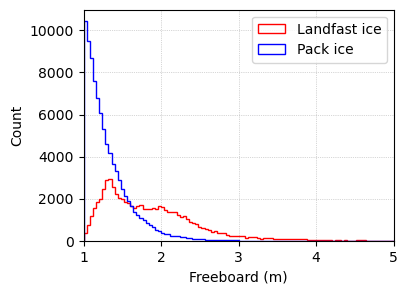

In [29]:
field = 'fb'
plt.subplots(1,1,figsize = (4,3))
plt.hist(df_ib[field], bins=100, color='red', range = (1, 5), histtype="step", density = False, label = "Landfast ice");
plt.hist(df_si[field], bins=100, color='blue', range = (1, 5), histtype="step", density = False, label = "Pack ice");
plt.axvline(0.015, c= "k", ls = ":")
plt.ylabel("Count")
plt.xlabel("Freeboard (m)")
plt.legend()
plt.xlim(1,5)
plt.grid(ls = ":", lw = 0.5)

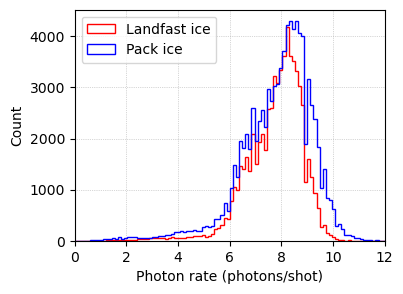

In [32]:
field = 'ph_rate'
plt.subplots(1,1,figsize = (4,3))
plt.hist(df_ib[field], bins=100, color='red', range = (0, 12), histtype="step", density = False, label = "Landfast ice");
plt.hist(df_si[field], bins=100, color='blue', range = (0, 12), histtype="step", density = False, label = "Pack ice");
# plt.axvline(0.015, c= "k", ls = ":")
plt.ylabel("Count")
plt.xlabel("Photon rate (photons/shot)")
plt.legend()
plt.xlim(0,12)
plt.grid(ls = ":", lw = 0.5)

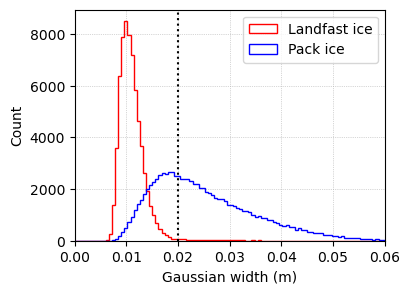

In [33]:
field = 'sigma'
plt.subplots(1,1,figsize = (4,3))
plt.hist(df_ib[field], bins=100, color='red', range = (0, 0.06), histtype="step", density = False, label = "Landfast ice");
plt.hist(df_si[field], bins=100, color='blue', range = (0, 0.06), histtype="step", density = False, label = "Pack ice");
plt.axvline(0.02, c= "k", ls = ":")
plt.ylabel("Count")
plt.xlabel("Gaussian width (m)")
plt.legend()
plt.xlim(0,0.06)
plt.grid(ls = ":", lw = 0.5)

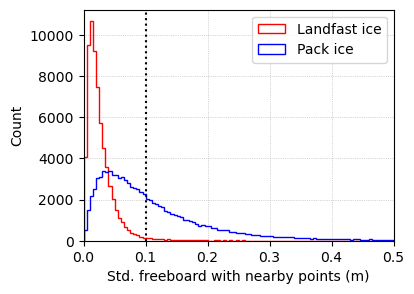

In [34]:
field = 'fb_std'
plt.subplots(1,1,figsize = (4,3))
plt.hist(df_ib[field], bins=100, color='red', range = (0, 0.5), histtype="step", density = False, label = "Landfast ice");
plt.hist(df_si[field], bins=100, color='blue', range = (0, 0.5), histtype="step", density = False, label = "Pack ice");
plt.axvline(0.1, c= "k", ls = ":")
plt.ylabel("Count")
plt.xlabel("Std. freeboard with nearby points (m)")
plt.legend()
plt.xlim(0,0.5)
plt.grid(ls = ":", lw = 0.5)